In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.rcParams['figure.figsize'] = (12, 6)
sns.set_style("whitegrid")
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('../data/ECommerce.csv')

print(f"데이터 크기: {df.shape[0]:,}행 x {df.shape[1]}열")
print(f"메모리 사용량: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

데이터 크기: 5,630행 x 20열
메모리 사용량: 2.40 MB


In [9]:
info_df = pd.DataFrame({
    'Column': df.columns,
    'Type': df.dtypes.values,
    'Missing': df.isnull().sum().values,
    'Missing_Pct': (df.isnull().sum() / len(df) * 100).round(2).values,
    'Unique': [df[col].nunique() for col in df.columns]
})

print(info_df.to_string(index=False))

                     Column    Type  Missing  Missing_Pct  Unique
                 CustomerID   int64        0         0.00    5630
                      Churn   int64        0         0.00       2
                     Tenure float64      264         4.69      36
       PreferredLoginDevice  object        0         0.00       3
                   CityTier   int64        0         0.00       3
            WarehouseToHome float64      251         4.46      34
       PreferredPaymentMode  object        0         0.00       7
                     Gender  object        0         0.00       2
             HourSpendOnApp float64      255         4.53       6
   NumberOfDeviceRegistered   int64        0         0.00       6
           PreferedOrderCat  object        0         0.00       6
          SatisfactionScore   int64        0         0.00       5
              MaritalStatus  object        0         0.00       3
            NumberOfAddress   int64        0         0.00      15
          

Churn Distribution:
Retained (0): 4,682 (83.16%)
Churned (1): 948 (16.84%)
Churn Rate: 16.84%


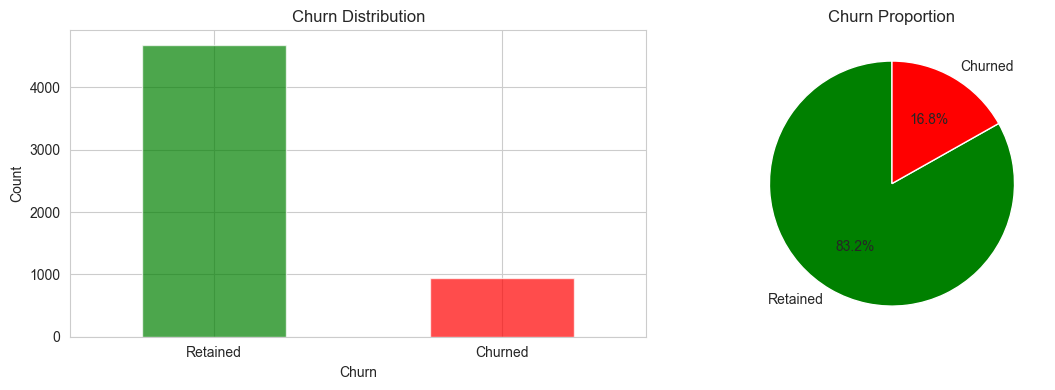

In [11]:
churn_counts = df['Churn'].value_counts()
churn_pct = df['Churn'].value_counts(normalize=True) * 100

print("Churn Distribution:")
print(f"Retained (0): {churn_counts[0]:,} ({churn_pct[0]:.2f}%)")
print(f"Churned (1): {churn_counts[1]:,} ({churn_pct[1]:.2f}%)")
print(f"Churn Rate: {df['Churn'].mean():.2%}")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

churn_counts.plot(kind='bar', ax=axes[0], color=['green', 'red'], alpha=0.7)
axes[0].set_title('Churn Distribution')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['Retained', 'Churned'], rotation=0)

axes[1].pie(churn_counts, labels=['Retained', 'Churned'], autopct='%1.1f%%', 
            colors=['green', 'red'], startangle=90)
axes[1].set_title('Churn Proportion')

plt.tight_layout()
plt.show()

Missing Values:
                             Count  Percent
DaySinceLastOrder              307     5.45
OrderAmountHikeFromlastYear    265     4.71
Tenure                         264     4.69
OrderCount                     258     4.58
CouponUsed                     256     4.55
HourSpendOnApp                 255     4.53
WarehouseToHome                251     4.46


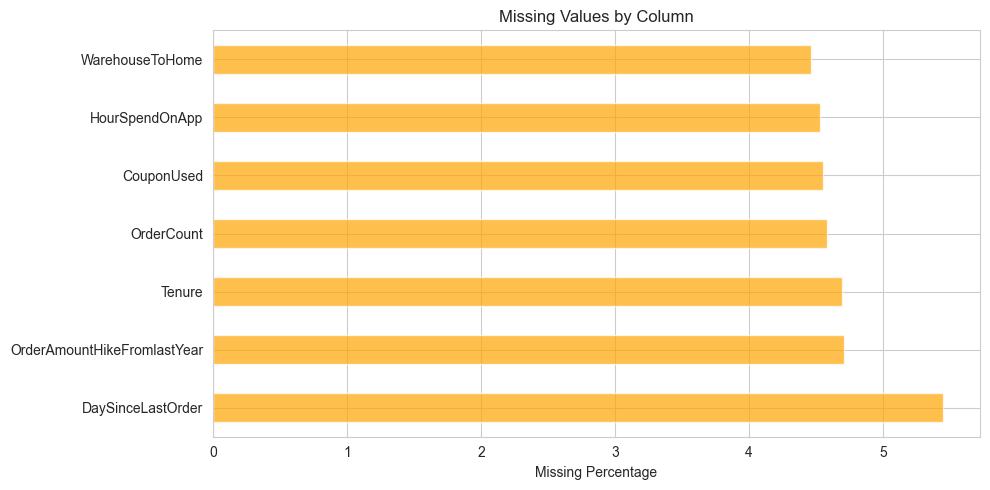

In [12]:
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    'Count': missing,
    'Percent': missing_pct
})

missing_df = missing_df[missing_df['Count'] > 0].sort_values('Count', ascending=False)

if len(missing_df) > 0:
    print("Missing Values:")
    print(missing_df)
    
    plt.figure(figsize=(10, 5))
    missing_df['Percent'].plot(kind='barh', color='orange', alpha=0.7)
    plt.xlabel('Missing Percentage')
    plt.title('Missing Values by Column')
    plt.tight_layout()
    plt.show()

In [13]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
stats = df[numeric_cols].describe().T
stats['Missing'] = df[numeric_cols].isnull().sum()

print(stats.round(2).to_string())

                              count      mean      std      min       25%      50%       75%      max  Missing
CustomerID                   5630.0  52815.50  1625.39  50001.0  51408.25  52815.5  54222.75  55630.0        0
Churn                        5630.0      0.17     0.37      0.0      0.00      0.0      0.00      1.0        0
Tenure                       5366.0     10.19     8.56      0.0      2.00      9.0     16.00     61.0      264
CityTier                     5630.0      1.65     0.92      1.0      1.00      1.0      3.00      3.0        0
WarehouseToHome              5379.0     15.64     8.53      5.0      9.00     14.0     20.00    127.0      251
HourSpendOnApp               5375.0      2.93     0.72      0.0      2.00      3.0      3.00      5.0      255
NumberOfDeviceRegistered     5630.0      3.69     1.02      1.0      3.00      4.0      4.00      6.0        0
SatisfactionScore            5630.0      3.07     1.38      1.0      2.00      3.0      4.00      5.0        0
N

In [14]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())


PreferredLoginDevice:
PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64

PreferredPaymentMode:
PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64

Gender:
Gender
Male      3384
Female    2246
Name: count, dtype: int64

PreferedOrderCat:
PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64

MaritalStatus:
MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64


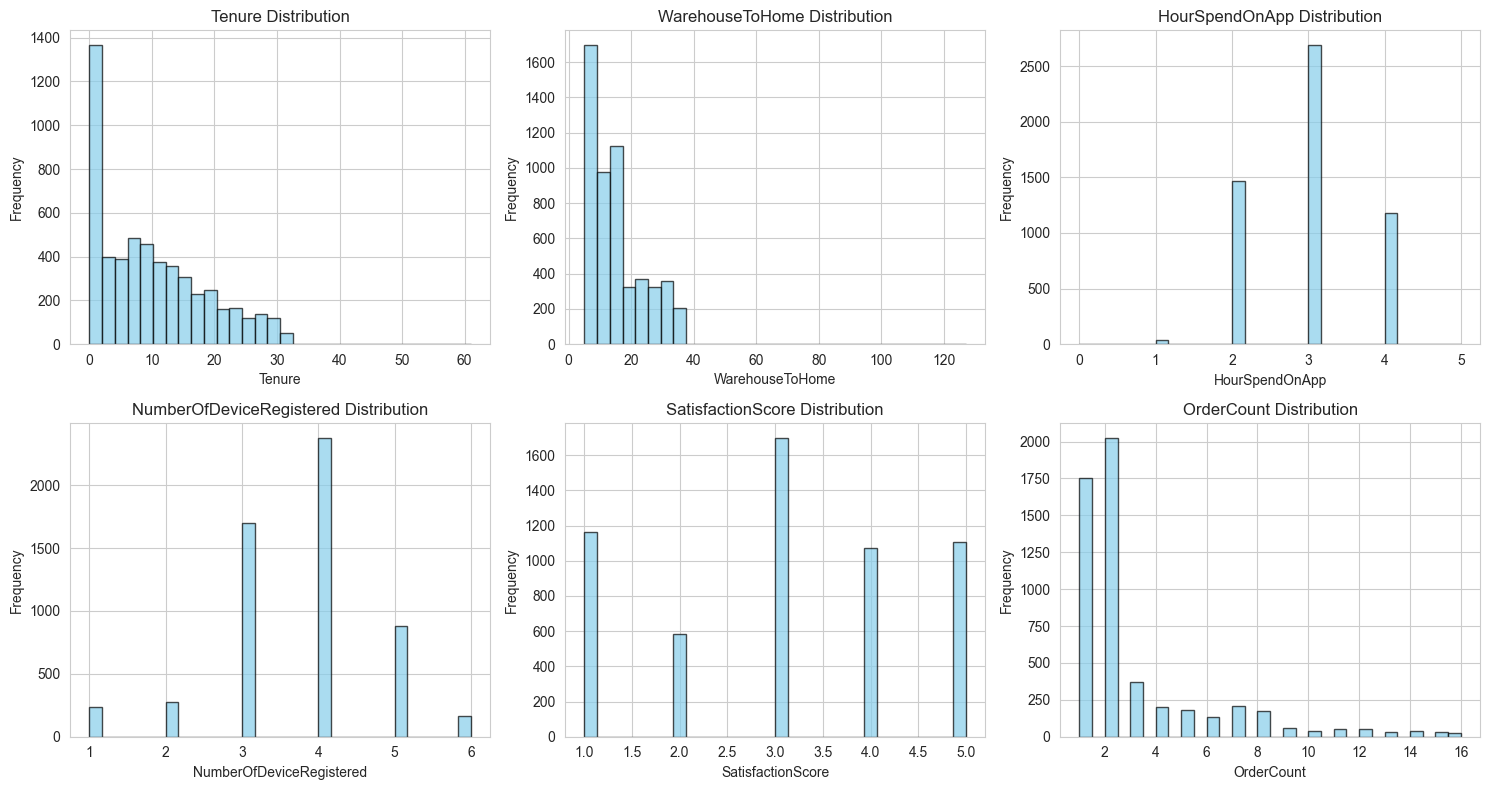

In [15]:
viz_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 
            'NumberOfDeviceRegistered', 'SatisfactionScore', 'OrderCount']

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for i, col in enumerate(viz_cols):
    df[col].hist(bins=30, ax=axes[i], color='skyblue', edgecolor='black', alpha=0.7)
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('../outputs/variable_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

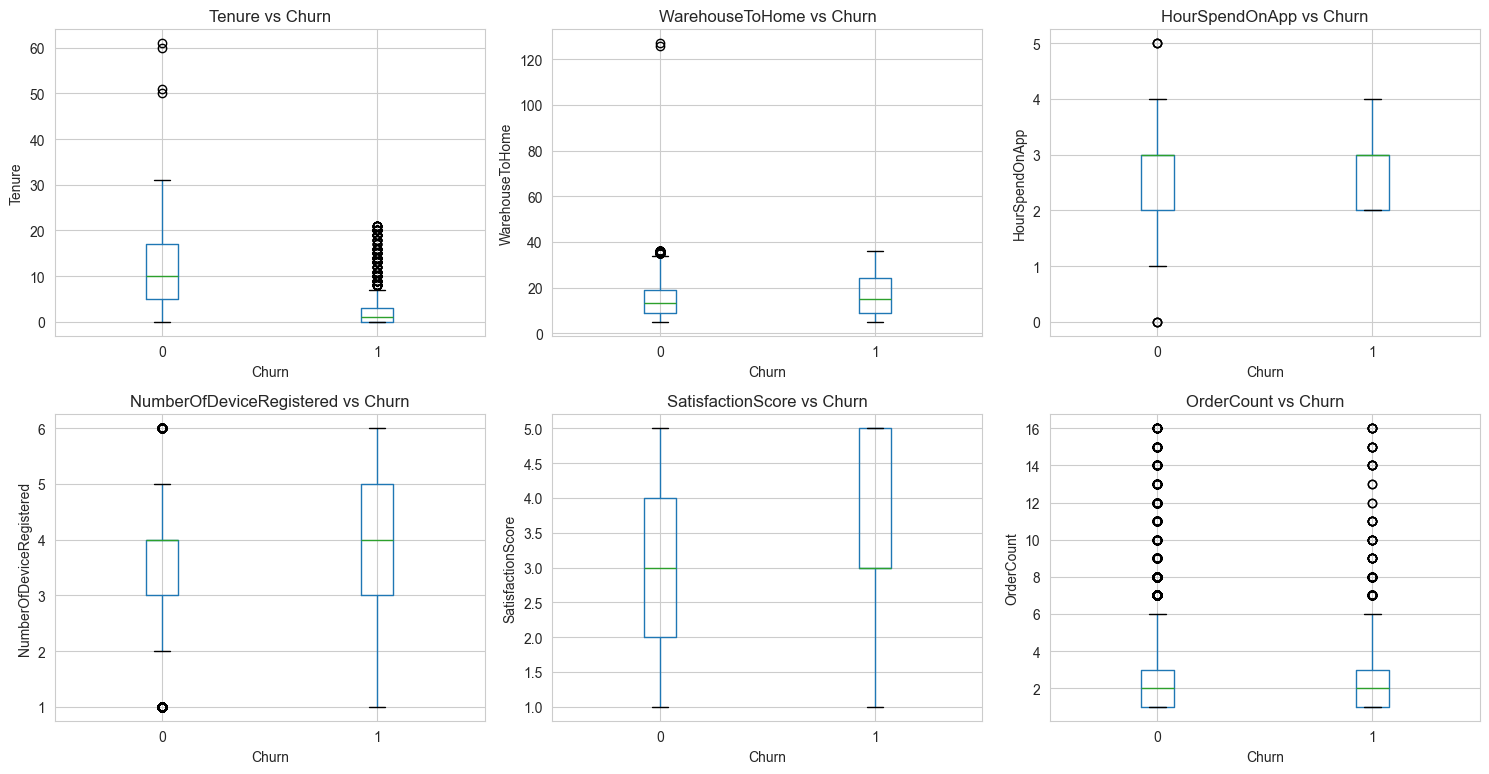

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for i, col in enumerate(viz_cols):
    df.boxplot(column=col, by='Churn', ax=axes[i])
    axes[i].set_title(f'{col} vs Churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(col)
    axes[i].get_figure().suptitle('')

plt.tight_layout()
plt.savefig('../outputs/churn_relationships.png', dpi=300, bbox_inches='tight')
plt.show()

In [17]:
print(f"Total customers: {len(df):,}")
print(f"Churned: {df['Churn'].sum():,} ({df['Churn'].mean():.2%})")
print(f"Retained: {(df['Churn']==0).sum():,}")
print(f"\nAvg Tenure: {df['Tenure'].mean():.1f} months")
print(f"Avg OrderCount: {df['OrderCount'].mean():.1f}")
print(f"Avg Satisfaction: {df['SatisfactionScore'].mean():.1f}/5")

Total customers: 5,630
Churned: 948 (16.84%)
Retained: 4,682

Avg Tenure: 10.2 months
Avg OrderCount: 3.0
Avg Satisfaction: 3.1/5
